# Project A - Q3 ANN Multilayer Perceptron (Telecommunication Dataset)

This code was used for the classification tasks described in Question 3 of Project A. The classifications of both Patient drug data set and Telecommunications data set were conducted using this code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
#from tools import plot_confusion_matrix

import csv
import tensorflow as tf
from numpy import arange, round, meshgrid, resize
import matplotlib.pyplot as plt

#Read the csv from C:\
my_data = pd.read_csv("projecta/tele_csv.csv", delimiter=",")
my_data[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [2]:
# X value with all the features except the target drug field
#y is the target drug field that is to be prediced by the model.
X = my_data[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
X[0:5]
class_names = ['Basic Service','E-Service','Plus Service','Total Service']

In [3]:
#Replace the drug with numeric
#my_data['custcat'].value_counts()

y_enc=my_data['custcat'].values
y_enc[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [4]:
y = np.zeros((len(X),4))
for i in range(0, len(X)): y[i,y_enc[i]-1] = 1

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#Split  the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(800, 11) (800, 4)
(200, 11) (200, 4)


In [7]:
# Create the model
x_ = tf.placeholder(tf.float32, [None, 11])
y_ = tf.placeholder(tf.float32, [None, 4])

neur = 300

# Create first layer weights
layer_0_weights = tf.Variable(tf.random_normal([11, neur]))
layer_0_bias = tf.Variable(tf.random_normal([neur]))
layer_0 = tf.nn.sigmoid(tf.add((tf.matmul(x_, layer_0_weights)), layer_0_bias))


# Create second layer weights
layer_1_weights = tf.Variable(tf.random_normal([neur, neur]))
layer_1_bias = tf.Variable(tf.random_normal([neur]))
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(layer_0, layer_1_weights), layer_1_bias))


"""
# Create second layer weights
layer_2_weights = tf.Variable(tf.random_normal([neur, neur]))
layer_2_bias = tf.Variable(tf.random_normal([neur]))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, layer_2_weights), layer_2_bias))
"""

# Create third layer weights
layer_3_weights = tf.Variable(tf.random_normal([neur, 4]))
layer_3_bias = tf.Variable(tf.random_normal([4]))
layer_3 = tf.nn.softmax(tf.add(tf.matmul(layer_1, layer_3_weights), layer_3_bias))

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.
Training...


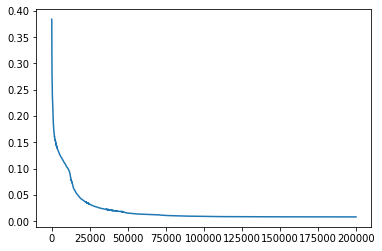

In [8]:
# Define error function
cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_, predictions=layer_3))

# Define optimizer and its task (minimise error function)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1).minimize(cost)

N_EPOCHS = 200000 #Increase the number of epochs to about 50000 to get better results. This will take some time for training.

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

print('Training...')

errors = []

# Train
for i in range(N_EPOCHS):
    _, error = sess.run([optimizer,cost], feed_dict={x_: X_train, y_: y_train})
    errors.append(error)
    
plt.plot(errors)
plt.show()       

In [23]:
# Display predictions
classifications2 = round(sess.run(layer_3, feed_dict={x_: X_train}))
#for input, target, prediction in zip(x, y, classifications):
#    print("input",input,"target",target,"prediction",prediction)
classifications2[0:10]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [24]:
def label_dencode(label):
    val= []
    if np.where(label == 1)[0]==0:
        val = 1.0
    elif np.where(label == 1)[0]==1:
        val = 2.0
    elif np.where(label == 1)[0]==2:
        val = 3.0
    elif np.where(label == 1)[0]==3:
        val = 4.0
    else: val = 0.0
    return val



In [25]:
class2 = list(np.zeros(len(classifications2))) 
for i in range(0, len(class2)): class2[i]=int(label_dencode(classifications2[i]))

y2 = list(np.zeros(len(y_train)))           
for i in range(0, len(y2)): y2[i]=int(label_dencode(round(y_train[i])))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The truth value of an empty array is ambiguous

In [26]:
confusion_matrix = np.zeros((len(class_names)+1, len(class_names)+1))

for true_label, predicted_label in zip(y2, class2):    
    confusion_matrix[true_label][predicted_label] += 1
    print(true_label, predicted_label,confusion_matrix[true_label][predicted_label])
    
confusion_matrix = confusion_matrix[1:5,1:5]

4 4 1.0
4 4 2.0
3 3 1.0
1 1 1.0
3 3 2.0
1 1 2.0
1 1 3.0
1 1 4.0
1 1 5.0
3 3 3.0
3 3 4.0
1 1 6.0
2 2 1.0
4 4 3.0
4 4 4.0
3 3 5.0
1 1 7.0
1 1 8.0
3 3 6.0
1 1 9.0
4 4 5.0
4 4 6.0
4 4 7.0
2 2 2.0
1 1 10.0
1 1 11.0
1 1 12.0
1 1 13.0
3 3 7.0
3 3 8.0
2 2 3.0
3 3 9.0
2 2 4.0
4 4 8.0
4 4 9.0
4 4 10.0
3 3 10.0
4 4 11.0
3 3 11.0
4 4 12.0
3 3 12.0
4 4 13.0
3 3 13.0
2 2 5.0
3 3 14.0
3 3 15.0
2 2 6.0
2 2 7.0
3 3 16.0
4 4 14.0
3 3 17.0
1 1 14.0
4 4 15.0
4 4 16.0
3 3 18.0
4 4 17.0
1 1 15.0
4 4 18.0
1 0 1.0
2 2 8.0
1 1 16.0
3 3 19.0
4 4 19.0
3 3 20.0
3 3 21.0
3 3 22.0
1 1 17.0
1 1 18.0
2 2 9.0
4 4 20.0
3 3 23.0
3 3 24.0
2 2 10.0
1 1 19.0
1 1 20.0
1 1 21.0
2 2 11.0
1 1 22.0
3 3 25.0
3 3 26.0
2 2 12.0
4 4 21.0
3 3 27.0
1 1 23.0
1 1 24.0
2 2 13.0
1 1 25.0
3 3 28.0
4 4 22.0
4 4 23.0
3 3 29.0
4 4 24.0
3 3 30.0
4 4 25.0
1 1 26.0
1 1 27.0
3 3 31.0
3 3 32.0
1 1 28.0
1 1 29.0
1 1 30.0
1 1 31.0
4 4 26.0
3 3 33.0
4 4 27.0
4 4 28.0
1 1 32.0
4 4 29.0
2 2 14.0
1 1 33.0
3 3 34.0
1 1 34.0
4 4 30.0
3 3 35.0
2 2 15.0
3 

In [27]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks([-0.5, 0.5, 1.5, 2.5, 3.5], classes)

    #fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[211.   0.   1.   0.]
 [  0. 167.   0.   0.]
 [  1.   2. 220.   0.]
 [  0.   0.   0. 184.]]
Normalized confusion matrix
[[1.   0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.01 0.99 0.  ]
 [0.   0.   0.   1.  ]]


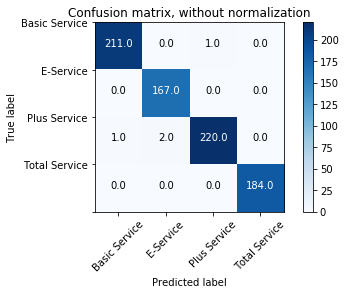

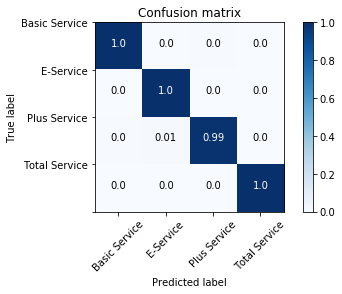

In [28]:
#from tools import plot_confusion_matrix
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['Basic Service','E-Service','Plus Service','Total Service'],normalize=False, title='Confusion matrix, without normalization')

plt.figure()     
plot_confusion_matrix(confusion_matrix, classes=['Basic Service','E-Service','Plus Service','Total Service'],normalize= True,  title='Confusion matrix')
plt.show()

Crossvalidation with test dataset

In [29]:
# Display predictions
classificationsTest = round(sess.run(layer_3, feed_dict={x_: X_test}))
#for input, target, prediction in zip(x, y, classifications):
#    print("input",input,"target",target,"prediction",prediction)
classificationsTest[0:10]

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [30]:
class2 = list(np.zeros(len(classificationsTest))) 
for i in range(0, len(class2)): class2[i]=int(label_dencode(classificationsTest[i]))

y2 = list(np.zeros(len(y_test)))           
for i in range(0, len(y2)): y2[i]=int(label_dencode(round(y_test[i])))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The truth value of an empty array is ambiguous

In [31]:
confusion_matrix = np.zeros((len(class_names)+1, len(class_names)+1))

for true_label, predicted_label in zip(y2, class2):    
    confusion_matrix[true_label][predicted_label] += 1
    print(true_label, predicted_label,confusion_matrix[true_label][predicted_label])
    
confusion_matrix = confusion_matrix[1:6,1:6]

4 0 1.0
1 1 1.0
1 1 2.0
2 2 1.0
4 4 1.0
4 4 2.0
3 1 1.0
1 0 1.0
3 3 1.0
4 0 2.0
4 1 1.0
2 4 1.0
4 1 2.0
1 2 1.0
4 3 1.0
3 1 2.0
4 2 1.0
2 2 2.0
3 1 3.0
4 4 3.0
1 1 3.0
1 4 1.0
1 1 4.0
3 0 1.0
4 1 3.0
4 3 2.0
4 3 3.0
2 2 3.0
4 1 4.0
3 4 1.0
1 3 1.0
1 1 5.0
4 4 4.0
3 3 2.0
4 1 5.0
4 4 5.0
3 3 3.0
3 2 1.0
4 2 2.0
4 0 3.0
2 2 4.0
4 3 4.0
1 3 2.0
1 0 2.0
2 4 2.0
4 0 4.0
3 3 4.0
3 1 4.0
2 2 5.0
2 2 6.0
2 4 3.0
3 3 5.0
2 2 7.0
3 2 2.0
3 3 6.0
4 1 6.0
4 4 6.0
3 3 7.0
1 4 2.0
4 4 7.0
1 1 6.0
2 3 1.0
3 3 8.0
3 3 9.0
3 4 2.0
1 3 3.0
4 4 8.0
3 0 2.0
2 4 4.0
4 3 5.0
3 1 5.0
1 1 7.0
4 4 9.0
3 3 10.0
1 1 8.0
4 2 3.0
2 1 1.0
4 4 10.0
3 1 6.0
2 3 2.0
1 1 9.0
3 1 7.0
1 1 10.0
1 3 4.0
1 2 2.0
2 4 5.0
3 1 8.0
2 3 3.0
1 1 11.0
3 2 3.0
4 1 7.0
1 1 12.0
3 3 11.0
1 1 13.0
3 2 4.0
1 3 5.0
4 1 8.0
1 1 14.0
1 1 15.0
3 4 3.0
4 3 6.0
1 1 16.0
4 3 7.0
3 4 4.0
4 3 8.0
4 2 4.0
2 3 4.0
1 4 3.0
3 2 5.0
4 1 9.0
4 4 11.0
1 3 6.0
2 1 2.0
2 3 5.0
1 3 7.0
2 1 3.0
3 1 9.0
1 2 3.0
3 1 10.0
1 1 17.0
1 4 4.0
1 1 18.0
2 2 8.0
3 

Confusion matrix, without normalization
[[21.  4. 15.  7.]
 [ 6. 19. 10.  8.]
 [16. 11. 17.  6.]
 [12.  6. 13. 16.]]
Normalized confusion matrix
[[0.45 0.09 0.32 0.15]
 [0.14 0.44 0.23 0.19]
 [0.32 0.22 0.34 0.12]
 [0.26 0.13 0.28 0.34]]


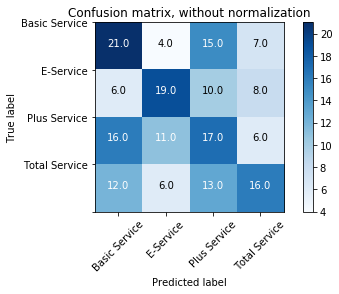

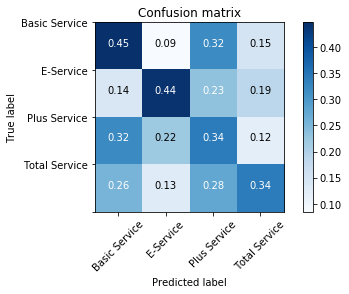

In [32]:
#np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['Basic Service','E-Service','Plus Service','Total Service'], normalize=False, title='Confusion matrix, without normalization')

plt.figure()     
plot_confusion_matrix(confusion_matrix, classes=['Basic Service','E-Service','Plus Service','Total Service'],normalize= True,  title='Confusion matrix')
plt.show()